In [ ]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from Pitch.My_Pitch import \
    myPitch  # might need adaptation of path depending on whether it is used in pycharm or jupyter notebook
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import numpy as np
from Data.Statsbomb_Data import match_events



In [ ]:
df, teams = match_events(match_id=3857261, event_filter='passes')

In [ ]:
df

In [ ]:
from Pass_Data import pass_data
passdata = pass_data(df, data_source='Statsbomb', mirror_away=[''])
print(passdata)

In [ ]:
passdata.data

In [ ]:
pE, pC = passdata.get_passes(get='England')

pBellingham, n = passdata.get_passes(get='Jude Bellingham', data=pE)
pBellingham

In [ ]:
pm = passdata.pass_map(pdop_y=-0.025, pdop_o=1,data=pBellingham)

In [ ]:
passdata2 = pass_data(df, data_source='Statsbomb', mirror_away=[''], scale_to_pitch='myPitch')
print(passdata2)

In [ ]:
pBellingham, n = passdata2.get_passes(get='Jude Bellingham')
pBellingham

In [ ]:
pm = passdata2.pass_map(pdop_y=1.05, pdop_o=1,data=pBellingham, pitch_col='#96b279')

# Pass network

In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from Pitch.My_Pitch import \
    myPitch  # might need adaptation of path depending on whether it is used in pycharm or jupyter notebook
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import numpy as np
from Data.Statsbomb_Data import match_events



None


In [2]:
df, teams = match_events(match_id=3857261, event_filter='passes')
from Pass_Data import pass_data
passdata = pass_data(df, data_source='Statsbomb', mirror_away=[''])
print(passdata)
pE, pC = passdata.get_passes(get='England')
pE

pass_data object of Statsbomb of shape (981, 19). Coordinate ranges are (0, 120) for x and (80, 0) for y


,player,period,minute,second,team,outcome,type,x_initial,y_initial,x_received,y_received,cross,cut-back,switch,shot_assist,goal_assist,play_pattern,related_events,recipient
2,Declan Rice,1,0,6,England,Out,Recovery,29.9,62.2,56.8,80.0,False,False,False,False,False,From Kick Off,"[cc3a9362-5f27-4b31-a11f-f776a3f12858, dd4b8fa...",Philip Foden
4,John Stones,1,0,25,England,Out,Recovery,20.4,74.7,74.5,80.0,False,False,False,False,False,From Throw In,"[544d2090-8f94-48d1-b78b-f3ffa62ba544, b4c9473...",Harry Kane
11,Jordan Brian Henderson,1,0,46,England,Complete,Recovery,80.0,73.5,80.2,78.7,False,False,False,False,False,Regular Play,"[4f00b46f-ee51-4377-8a43-4b4054cc0364, b0fff6e...",Jude Bellingham
12,Jude Bellingham,1,0,50,England,Complete,Regular,80.4,76.9,84.7,70.1,False,False,False,False,False,Regular Play,[e6b312b3-f913-4835-8a4a-b6b3722ca506],Harry Kane
13,Harry Kane,1,0,50,England,Out,Regular,84.5,70.1,68.2,80.0,False,False,False,False,False,Regular Play,[4a8cdb84-358c-4820-9c83-aff4ffb1f8bb],Kyle Walker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Jordan Brian Henderson,2,93,15,England,Complete,Regular,82.2,37.0,81.3,42.1,False,False,False,False,False,From Free Kick,[a51c9035-edee-4e2f-9972-5d6893455952],Jack Grealish
976,Jack Grealish,2,93,19,England,Complete,Regular,107.2,50.4,108.4,45.3,False,False,False,False,False,From Free Kick,[c5919be5-1b37-438f-a378-eb91a0f42d6f],Callum Wilson
977,Jack Grealish,2,93,24,England,Complete,Regular,111.7,47.7,111.0,48.5,False,False,False,True,False,From Free Kick,[9e0c67f4-ef33-4a0f-ad8b-b7df08b6dd66],Philip Foden
979,Trent Alexander-Arnold,2,93,55,England,Complete,Throw-in,113.5,80.0,103.9,57.2,False,False,False,False,False,From Throw In,[069ae913-ee12-4380-88d9-e7ccdc0f62ac],Jack Grealish


(<Figure size 640x480 with 1 Axes>,
 {'Declan Rice': {'x_avg': 64.49166666666666,
   'y_avg': 35.19166666666666,
   'n': 48,
   'n_complete': 45,
   'receivers': {'Philip Foden': 5,
    'Jude Bellingham': 2,
    'Luke Shaw': 12,
    'Harry Maguire': 8,
    'John Stones': 5,
    'Jordan Brian Henderson': 6,
    'Harry Kane': 1,
    'Marcus Rashford': 6,
    'Kyle Walker': 3}},
  'John Stones': {'x_avg': 45.054878048780495,
   'y_avg': 52.91097560975609,
   'n': 82,
   'n_complete': 75,
   'receivers': {'Harry Kane': 2,
    'Jordan Brian Henderson': 16,
    'Kyle Walker': 14,
    'Jordan Pickford': 5,
    'Harry Maguire': 19,
    'Declan Rice': 4,
    'Luke Shaw': 2,
    'Philip Foden': 2,
    'Marcus Rashford': 2,
    'Jude Bellingham': 2,
    'None': 2,
    'Callum Wilson': 1,
    'Trent Alexander-Arnold': 8,
    'Jack Grealish': 1,
    'Kalvin Phillips': 2}},
  'Jordan Brian Henderson': {'x_avg': 70.5311475409836,
   'y_avg': 56.74262295081967,
   'n': 61,
   'n_complete': 50,
   'rec

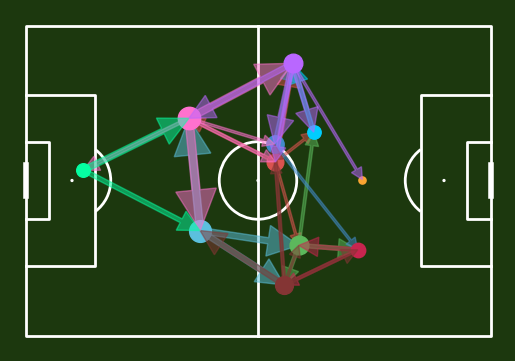

In [3]:
passdata.pass_network(data=pE)

In [4]:
df, teams = match_events(match_id=3857261, event_filter='passes')
from Pass_Data import pass_data
passdata = pass_data(df, data_source='Statsbomb', mirror_away=[''], scale_to_pitch='myPitch')
print(passdata)
pE, pC = passdata.get_passes(get='England')
pE

pass_data object of Statsbomb of shape (981, 19). Coordinate ranges are (0, 105) for x and (0, 65) for y


,player,period,minute,second,team,outcome,type,x_initial,y_initial,x_received,y_received,cross,cut-back,switch,shot_assist,goal_assist,play_pattern,related_events,recipient
2,Declan Rice,1,0,6,England,Out,Recovery,26.1625,14.46250,49.7000,0.00000,False,False,False,False,False,From Kick Off,"[cc3a9362-5f27-4b31-a11f-f776a3f12858, dd4b8fa...",Philip Foden
4,John Stones,1,0,25,England,Out,Recovery,17.8500,4.30625,65.1875,0.00000,False,False,False,False,False,From Throw In,"[544d2090-8f94-48d1-b78b-f3ffa62ba544, b4c9473...",Harry Kane
11,Jordan Brian Henderson,1,0,46,England,Complete,Recovery,70.0000,5.28125,70.1750,1.05625,False,False,False,False,False,Regular Play,"[4f00b46f-ee51-4377-8a43-4b4054cc0364, b0fff6e...",Jude Bellingham
12,Jude Bellingham,1,0,50,England,Complete,Regular,70.3500,2.51875,74.1125,8.04375,False,False,False,False,False,Regular Play,[e6b312b3-f913-4835-8a4a-b6b3722ca506],Harry Kane
13,Harry Kane,1,0,50,England,Out,Regular,73.9375,8.04375,59.6750,0.00000,False,False,False,False,False,Regular Play,[4a8cdb84-358c-4820-9c83-aff4ffb1f8bb],Kyle Walker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Jordan Brian Henderson,2,93,15,England,Complete,Regular,71.9250,34.93750,71.1375,30.79375,False,False,False,False,False,From Free Kick,[a51c9035-edee-4e2f-9972-5d6893455952],Jack Grealish
976,Jack Grealish,2,93,19,England,Complete,Regular,93.8000,24.05000,94.8500,28.19375,False,False,False,False,False,From Free Kick,[c5919be5-1b37-438f-a378-eb91a0f42d6f],Callum Wilson
977,Jack Grealish,2,93,24,England,Complete,Regular,97.7375,26.24375,97.1250,25.59375,False,False,False,True,False,From Free Kick,[9e0c67f4-ef33-4a0f-ad8b-b7df08b6dd66],Philip Foden
979,Trent Alexander-Arnold,2,93,55,England,Complete,Throw-in,99.3125,0.00000,90.9125,18.52500,False,False,False,False,False,From Throw In,[069ae913-ee12-4380-88d9-e7ccdc0f62ac],Jack Grealish


(<Figure size 640x480 with 1 Axes>,
 {'Declan Rice': {'x_avg': 56.43020833333333,
   'y_avg': 36.40677083333333,
   'n': 48,
   'n_complete': 45,
   'receivers': {'Philip Foden': 5,
    'Jude Bellingham': 2,
    'Luke Shaw': 12,
    'Harry Maguire': 8,
    'John Stones': 5,
    'Jordan Brian Henderson': 6,
    'Harry Kane': 1,
    'Marcus Rashford': 6,
    'Kyle Walker': 3}},
  'John Stones': {'x_avg': 39.42301829268292,
   'y_avg': 22.009832317073172,
   'n': 82,
   'n_complete': 75,
   'receivers': {'Harry Kane': 2,
    'Jordan Brian Henderson': 16,
    'Kyle Walker': 14,
    'Jordan Pickford': 5,
    'Harry Maguire': 19,
    'Declan Rice': 4,
    'Luke Shaw': 2,
    'Philip Foden': 2,
    'Marcus Rashford': 2,
    'Jude Bellingham': 2,
    'None': 2,
    'Callum Wilson': 1,
    'Trent Alexander-Arnold': 8,
    'Jack Grealish': 1,
    'Kalvin Phillips': 2}},
  'Jordan Brian Henderson': {'x_avg': 61.714754098360665,
   'y_avg': 18.896618852459014,
   'n': 61,
   'n_complete': 50,
   '

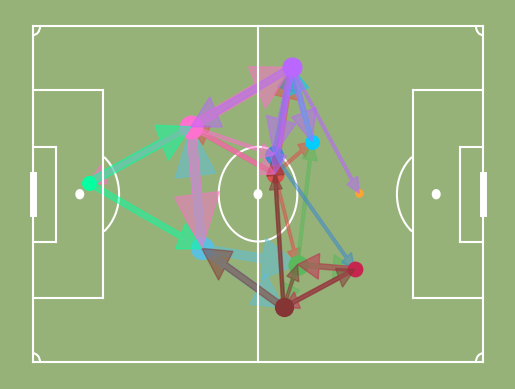

In [5]:
passdata.pass_network(data=pE, pitch_col='#96b279')

In [ ]:
passdata[]